In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load train data
train_data = pd.read_csv('../dataset/Train.csv')
# load test data
test_data = pd.read_csv('../dataset/Test.csv')

In [3]:
# Study the data
print(train_data.shape)
print(train_data.info())
print(train_data.describe())

(8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
       Item_Weight  Item_Visi

In [4]:
# Explore data unique values

Item_Identifier_values = train_data['Item_Identifier'].unique()
# print(Item_Identifier_values)
print(Item_Identifier_values.shape)

Item_Weight_values = train_data['Item_Weight'].unique()
# print(Item_Weight_values)
print(Item_Weight_values.shape)

Item_Fat_Content_values = train_data['Item_Fat_Content'].unique()
print(Item_Fat_Content_values)
print(Item_Fat_Content_values.shape)

Item_Visibility_values = train_data['Item_Visibility'].unique()
# print(Item_Visibility_values)
print(Item_Visibility_values.shape)

Item_Type_values = train_data['Item_Type'].unique()
print(Item_Type_values)
print(Item_Type_values.shape)

Item_MRP_values = train_data['Item_MRP'].unique()
# print(Item_MRP_values)
print(Item_MRP_values.shape)

Outlet_Identifier_values = train_data['Outlet_Identifier'].unique()
print(Outlet_Identifier_values)
print(Outlet_Identifier_values.shape)

Outlet_Establishment_Year_values = train_data['Outlet_Establishment_Year'].unique()
print(Outlet_Establishment_Year_values)
print(Outlet_Establishment_Year_values.shape)

Outlet_Size_values = train_data['Outlet_Size'].unique()
print(Outlet_Size_values)
print(Outlet_Size_values.shape)

Outlet_Location_Type_values = train_data['Outlet_Location_Type'].unique()
print(Outlet_Location_Type_values)
print(Outlet_Location_Type_values.shape)

Outlet_Type_values = train_data['Outlet_Type'].unique()
print(Outlet_Type_values)
print(Outlet_Type_values.shape)

(1559,)
(416,)
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
(5,)
(7880,)
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
(16,)
(5938,)
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
(10,)
[1999 2009 1998 1987 1985 2002 2007 1997 2004]
(9,)
['Medium' nan 'High' 'Small']
(4,)
['Tier 1' 'Tier 3' 'Tier 2']
(3,)
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
(4,)


In [5]:
# Explore data null values
print(train_data['Item_Identifier'].isnull().sum())
print(train_data['Item_Weight'].isnull().sum())
print(train_data['Item_Fat_Content'].isnull().sum())
print(train_data['Item_Visibility'].isnull().sum())
print(train_data['Item_Type'].isnull().sum())
print(train_data['Item_MRP'].isnull().sum())
print(train_data['Outlet_Identifier'].isnull().sum())
print(train_data['Outlet_Establishment_Year'].isnull().sum())
print(train_data['Outlet_Size'].isnull().sum())
print(train_data['Outlet_Location_Type'].isnull().sum())
print(train_data['Outlet_Type'].isnull().sum())

0
1463
0
0
0
0
0
0
2410
0
0


In [6]:
# Make Item_Fat_Content has only 2 values
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

# convert Outlet_Establishment_Year to str
train_data['Outlet_Establishment_Year'] = train_data['Outlet_Establishment_Year'].astype(str)

In [7]:
# handle missing values
# handle missing values in Item_Weight -> numerical
median_item_weight = train_data['Item_Weight'].median()
train_data['Item_Weight'].replace(np.nan,median_item_weight,inplace=True)
print(train_data['Item_Weight'].isnull().sum())

# handle missing values in Outlet_Size -> categorical
mode_outlet_size = train_data['Outlet_Size'].mode().values[0]
train_data['Outlet_Size'].replace(np.nan,mode_outlet_size,inplace=True)
print(train_data['Outlet_Size'].isnull().sum())

0
0


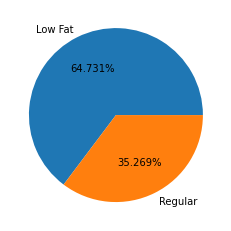

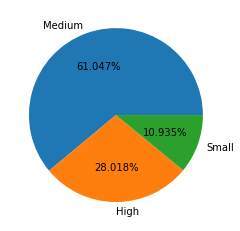

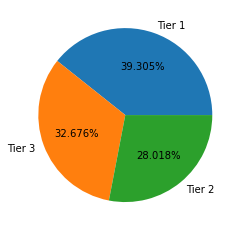

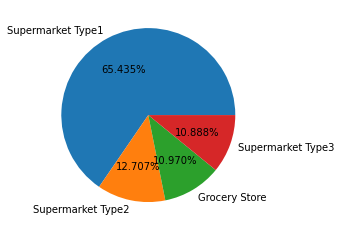

In [8]:
# pie charts for categorical columns with few values
plt.pie(train_data['Item_Fat_Content'].value_counts(),labels=train_data['Item_Fat_Content'].unique(),autopct='%0.3f%%')
plt.show()

plt.pie(train_data['Outlet_Size'].value_counts(),labels=train_data['Outlet_Size'].unique(),autopct='%0.3f%%')
plt.show()

plt.pie(train_data['Outlet_Location_Type'].value_counts(),labels=train_data['Outlet_Location_Type'].unique(),autopct='%0.3f%%')
plt.show()

plt.pie(train_data['Outlet_Type'].value_counts(),labels=train_data['Outlet_Type'].unique(),autopct='%0.3f%%')
plt.show()


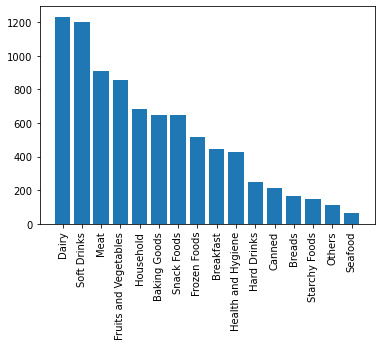

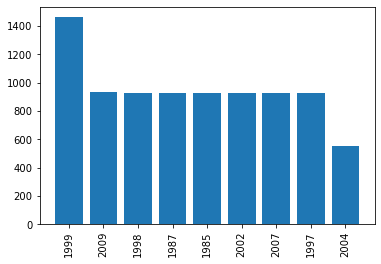

In [9]:
# bar charts for categorical columns with many values
plt.bar(train_data['Item_Type'].unique(),train_data['Item_Type'].value_counts() )
plt.xticks(rotation=90)
plt.show()

plt.bar(train_data['Outlet_Establishment_Year'].unique(),train_data['Outlet_Establishment_Year'].value_counts() )
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Item_MRP')

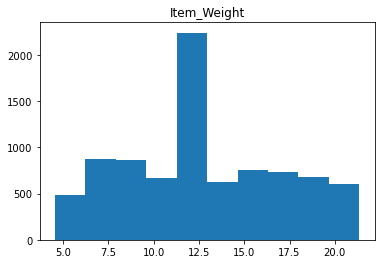

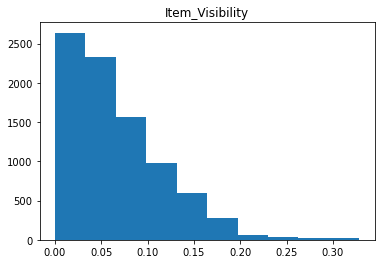

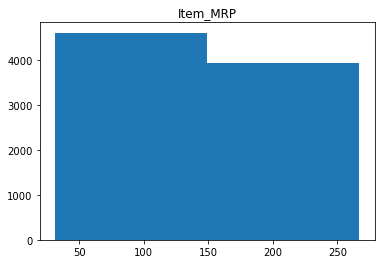

In [10]:
# histograms for numerical columns
fig=plt.figure()
plt.hist(train_data['Item_Weight'],bins = 10)
plt.title('Item_Weight')

fig=plt.figure()
plt.hist(train_data['Item_Visibility'],bins = 10)
plt.title('Item_Visibility')

fig=plt.figure()
plt.hist(train_data['Item_MRP'],bins = 2)
plt.title('Item_MRP')

Text(0.5, 1.0, 'Item_MRP')

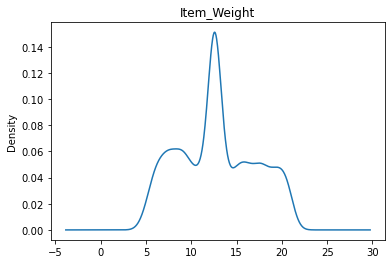

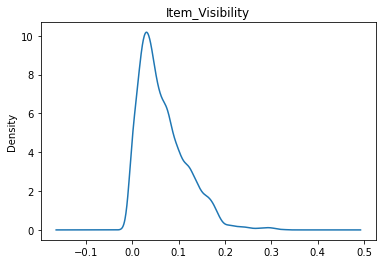

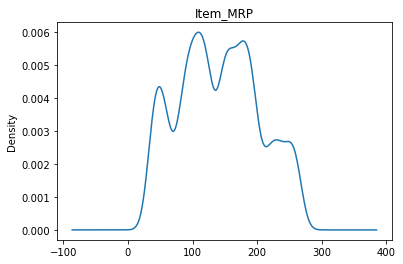

In [11]:
# density plots for numerical columns
fig=plt.figure()
train_data['Item_Weight'].plot(kind='density')
plt.title('Item_Weight')

fig=plt.figure()
train_data['Item_Visibility'].plot(kind='density')
plt.title('Item_Visibility')

fig=plt.figure()
train_data['Item_MRP'].plot(kind='density')
plt.title('Item_MRP')

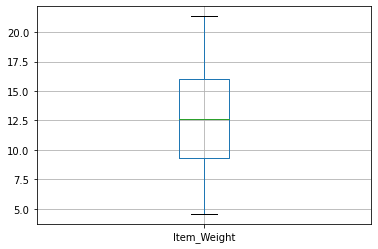

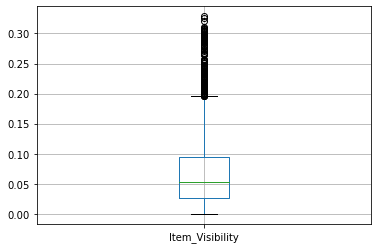

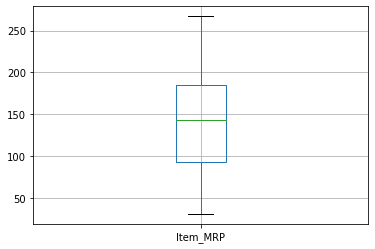

In [12]:
# boxplots for numerical columns
train_data.boxplot(column=['Item_Weight'])
plt.show()

train_data.boxplot(column=['Item_Visibility'])
plt.show()

train_data.boxplot(column=['Item_MRP'])
plt.show()

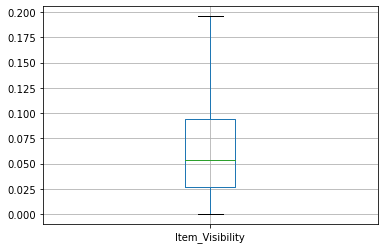

In [13]:
# handle outliers 

# handle outliers in Item_Visibility
Q1 = train_data['Item_Visibility'].quantile(0.25)
Q3 = train_data['Item_Visibility'].quantile(0.75)
lower_range = Q1 - 1.5 * (Q3 - Q1)
upper_range = Q3 + 1.5 * (Q3 - Q1)
train_data['Item_Visibility'] = np.where(train_data['Item_Visibility'] > upper_range, upper_range, train_data['Item_Visibility'])
train_data['Item_Visibility'] = np.where(train_data['Item_Visibility'] < lower_range, lower_range, train_data['Item_Visibility'])

# boxplot after handling outliers
train_data.boxplot(column=['Item_Visibility'])
plt.show()

In [14]:
# check for duplicated rows
print(train_data.duplicated().sum())

0


In [15]:
# correlation analysis
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.013744,0.024951,0.009693
Item_Visibility,-0.013744,1.000000,-0.001163,-0.117918
Item_MRP,0.024951,-0.001163,1.000000,0.567574
Item_Outlet_Sales,0.009693,-0.117918,0.567574,1.000000


In [17]:
# all_features_list = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
# feature_analysis_df = feature_analysis(y='Item_Outlet_Sales', features=all_features_list, trn_df=train_data, tst_df=test_data, y_hat=None) 


In [24]:
# encoding for categorical features
def categorical_label_encoding(feature):
    le = preprocessing.LabelEncoder()
    encoded_column = le.fit_transform(train_data[feature])
#     print(encoded_column)
    train_data[feature] = encoded_column
    
categorical_label_encoding('Item_Fat_Content')
categorical_label_encoding('Item_Type')
categorical_label_encoding('Outlet_Identifier')
categorical_label_encoding('Outlet_Establishment_Year')
categorical_label_encoding('Outlet_Size')
categorical_label_encoding('Outlet_Location_Type')
categorical_label_encoding('Outlet_Type')

In [35]:
# Scaling and normalizing 
# scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
 
train_data['Item_Weight'] = scaler.fit_transform(train_data[['Item_Weight']])
train_data['Item_Visibility'] = scaler.fit_transform(train_data[['Item_Visibility']])
train_data['Item_MRP'] = scaler.fit_transform(train_data[['Item_MRP']])

print(train_data.describe())

       Item_Weight  Item_Fat_Content  Item_Visibility    Item_Type  \
count  8523.000000       8523.000000      8523.000000  8523.000000   
mean      0.491719          0.352693         0.333235     7.226681   
std       0.251696          0.477836         0.249216     4.209990   
min       0.000000          0.000000         0.000000     0.000000   
25%       0.283120          0.000000         0.137716     4.000000   
50%       0.479012          0.000000         0.275187     6.000000   
75%       0.681453          1.000000         0.482630    10.000000   
max       1.000000          1.000000         1.000000    15.000000   

          Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
count  8523.000000        8523.000000                8523.000000  8523.000000   
mean      0.465635           4.722281                   3.790684     1.170832   
std       0.264327           2.837201                   2.730322     0.600327   
min       0.000000           0.000000        